In [2]:
library("chron")
library("nortest")
library("nortsTest")
library("ggplot2")
library("tseries")

Warning message:
"pakiet 'nortsTest' został zbudowany w wersji R 4.2.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'nortsTest':
  method      from    
  autoplot.ts forecast
  fortify.ts  forecast

Warning message:
"pakiet 'ggplot2' został zbudowany w wersji R 4.2.2"

Dołączanie pakietu: 'tseries'


Następujący obiekt został zakryty z 'package:chron':

    is.weekend




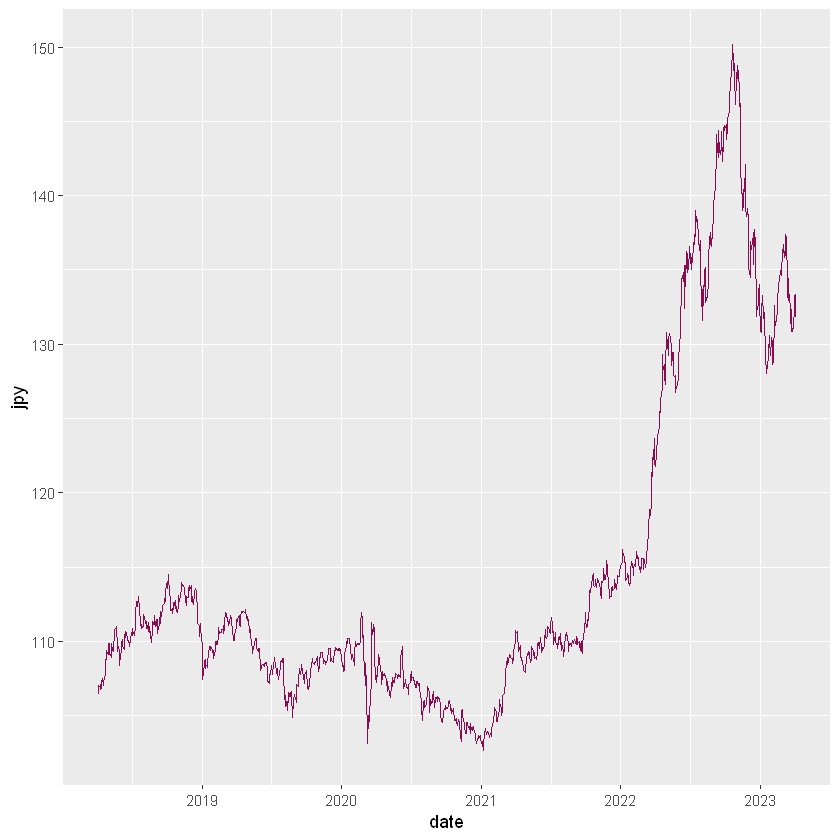

In [72]:
datf <- read.csv("JPY.csv")
datf$Close[296] <- (as.double(datf$Close[295]) + as.double(datf$Close[297]))/2
jpy <- as.double(datf$Close) 
date <- as.POSIXct(datf$Date)
#data <- datf$RH_7[1:1000]
ggplot() + geom_line(aes(date, jpy), color="deeppink4") # + labs(x="Data", y="Wilgotność")
#ggsave("X.jpg", P)
#P

In [73]:
jpy1 = diff(jpy)/jpy[1:(length(jpy)-1)]*100

In [101]:
adf.test(jpy)



	Augmented Dickey-Fuller Test

data:  jpy
Dickey-Fuller = -1.4177, Lag order = 10, p-value = 0.8248
alternative hypothesis: stationary


In [102]:
adf.test(jpy1)

Warning message in adf.test(jpy1):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  jpy1
Dickey-Fuller = -11.373, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [75]:
df <- data.frame(t=date[1:length(jpy1)], data=jpy1)

In [76]:
draw_acf <- function(stem, title) {
    p <- ggplot(stem) +
        geom_segment(aes(lag, ACF, xend=lag, yend=ACF-ACF), color="blue3") + 
        geom_point(aes(lag, ACF),size=1, color="blue3") +
        geom_hline(yintercept=0, color="red") +
        geom_rect(mapping=aes(xmin=0, xmax=hmax, ymin=-0.05, ymax=0.05), fill="deeppink4", alpha=0.01)
    ggsave(title, p)
    p
}

draw_pacf <- function(stem, title) {
    p <- ggplot(stem) +
        geom_segment(aes(lag, PACF, xend=lag, yend=PACF-PACF), color="blue3") + 
        geom_point(aes(lag, PACF),size=1, color="blue3") +
        geom_hline(yintercept=0, color="red") +
        geom_rect(mapping=aes(xmin=0, xmax=hmax, ymin=-0.05528, ymax=0.05528), fill="deeppink4", alpha=0.01)
    ggsave(title, p)
    p
}

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


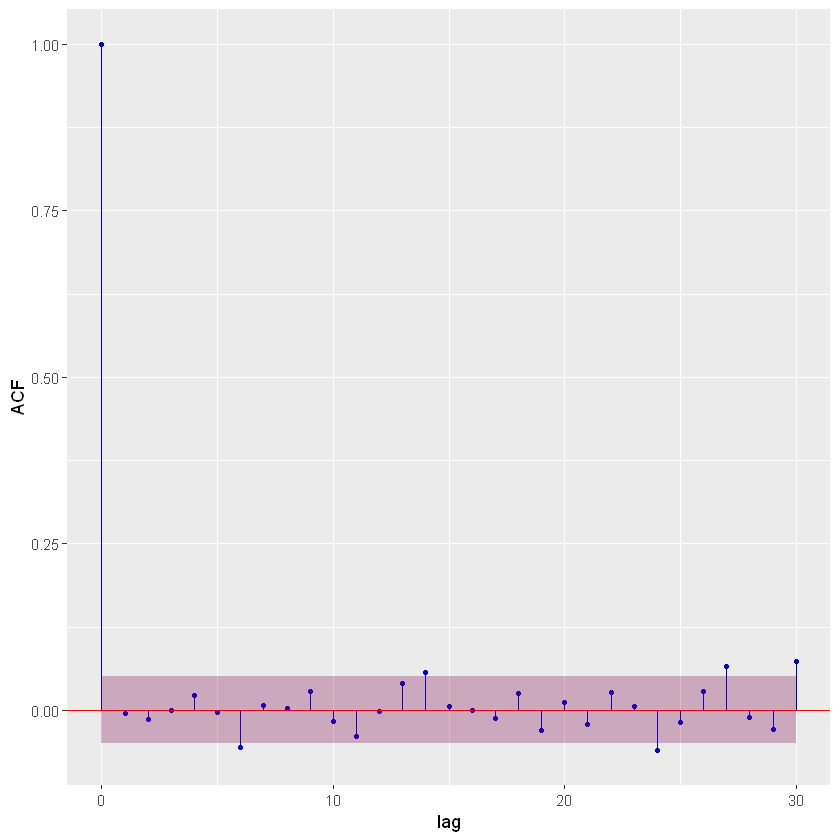

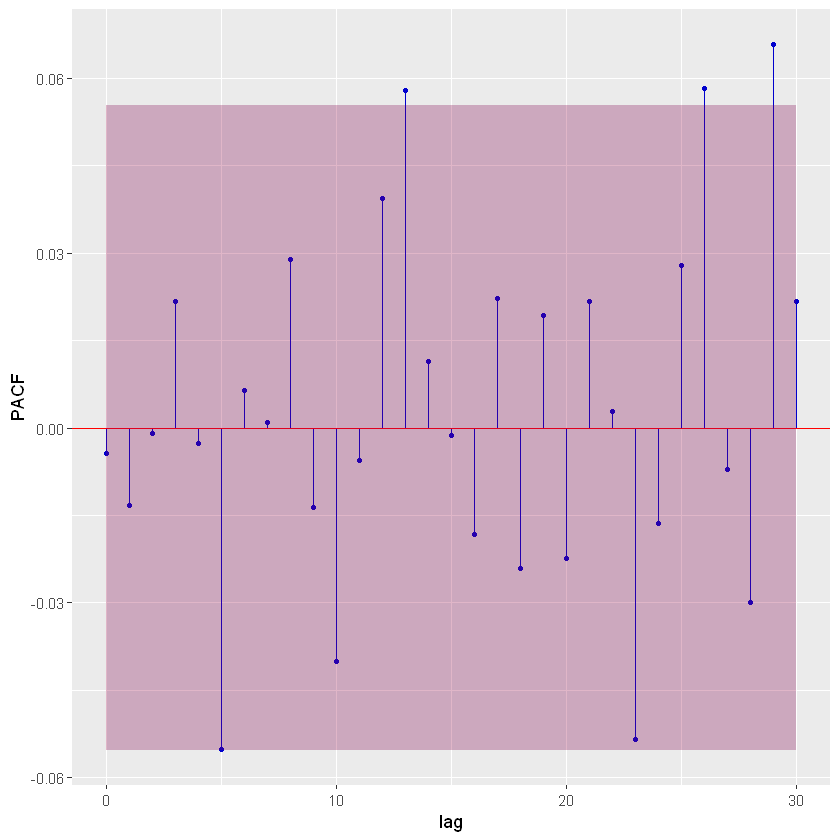

In [77]:
hmax <- 30
lags <- 0:hmax
acf1 <- acf(df$data, plot=FALSE)$acf[0:hmax+1]
stem1 <- data.frame(lag=lags, ACF=acf1)

pacf1 <- pacf(df$data, plot=FALSE)[[1]][0:hmax+1]
stem2 <- data.frame(lag=lags, PACF=pacf1)
colnames(stem2) <- c("lag", "PACF")

draw_acf(stem1, "acf_1.jpg")
draw_pacf(stem2, "pacf_1.jpg")

In [78]:
data <- df$data
hmax <- 23
lags <- 0:hmax

In [79]:
find_arma <- function(data, max_p, max_q) {
  possibles = expand.grid(c(1:max_p), c(1:max_q))
  AIC_results <- c(1:dim(possibles)[1])
  for (i in 1:nrow(possibles)) {
    vec <- possibles[i, ]
    model <- arima(data, order=c(vec[1]$Var1, 0, vec[2]$Var2))
    AIC_results[i] <- model$aic
  }
  data.frame(possible=possibles, AIC=AIC_results)
}

In [80]:
find_arma_results <- find_arma(data, 5, 5)
colnames(find_arma_results) <- c("p", "q", "AIC")

Warning message in log(s2):
"wyprodukowano wartości NaN"
Warning message in log(s2):
"wyprodukowano wartości NaN"
Warning message in arima(data, order = c(vec[1]$Var1, 0, vec[2]$Var2)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"


Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


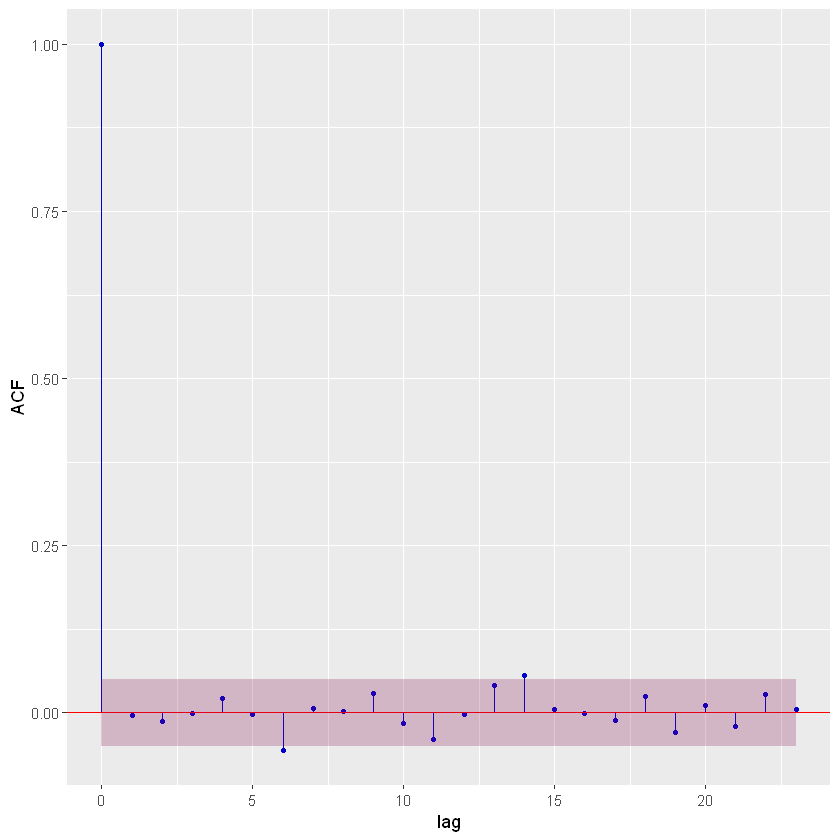

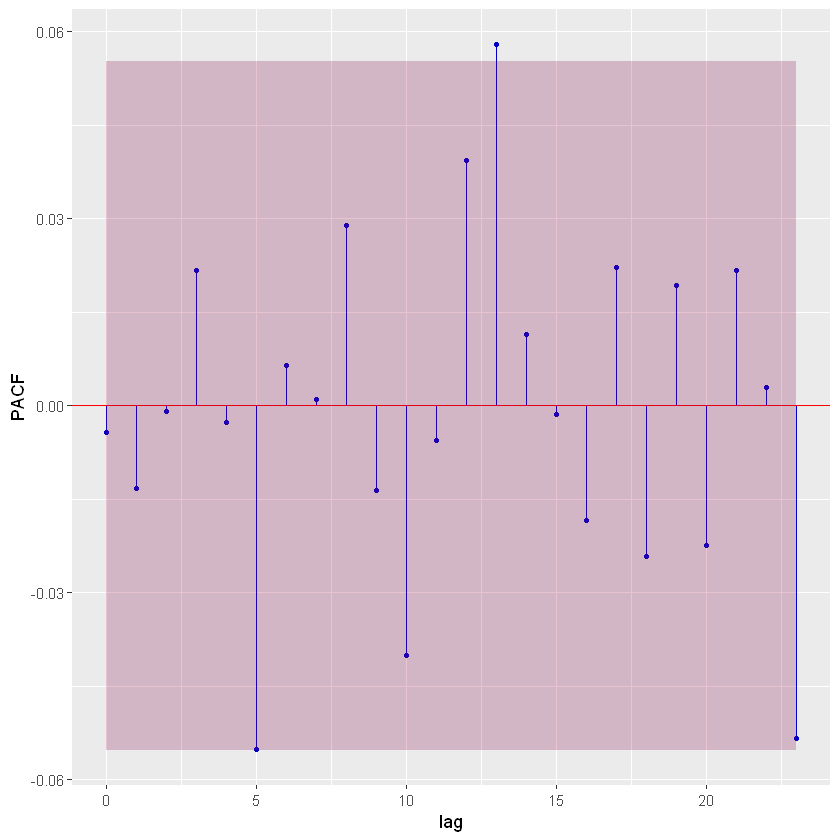

In [81]:
acf2 <- acf(df$data, plot=FALSE)$acf[0:hmax+1]
stem1 <- data.frame(lag=lags, ACF=acf2)

pacf2 <- pacf(df$data, plot=FALSE)[[1]][0:hmax+1]
stem2 <- data.frame(lag=lags, PACF=pacf2)
colnames(stem2) <- c("lag", "PACF")

draw_acf(stem1, "acf_2.jpg")
draw_pacf(stem2, "pacf_2.jpg")

In [82]:
model <- arima(data, order=c(2, 0, 2))
sigma <- model$sigma2
coeffs <- model$coef

cfs <- round(model$coef, 3)
cfs

ar1       ar2       ma1       ma2 intercept 
    0.334    -0.990    -0.344     0.977     0.018

In [83]:
sigma

[1] 0.2584457

p,q,AIC
<int>,<int>,<dbl>
1,1,1960.727
2,1,1962.497
3,1,1964.496
4,1,1965.875
5,1,1967.051
1,2,1962.531
2,2,1948.806
3,2,1950.771
4,2,1952.422


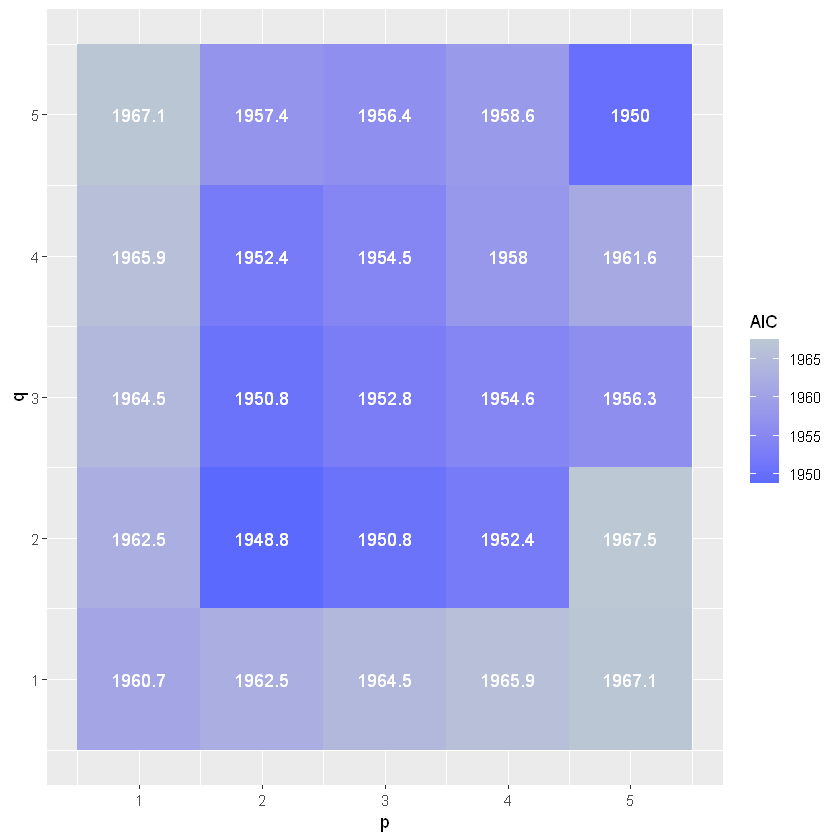

In [84]:
find_arma_results
ggplot(find_arma_results, aes(p, q, fill=AIC)) +
  geom_tile() + 
  geom_text(label=round(find_arma_results$AIC, 1), colour = "white") + 
  scale_fill_gradient(low = "#5c69ff", high = "#bcc8d4")

##niby wychodzi 2,2 ale bierzemy 5,1 bo jest lepsze xd
## no i nie zapisuje wykresu bo nasze szachrajstwo wyjdzie na jaw

ar1       ar2       ma1       ma2 intercept 
    0.334    -0.990    -0.344     0.977     0.018

[1] 0.2584457

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


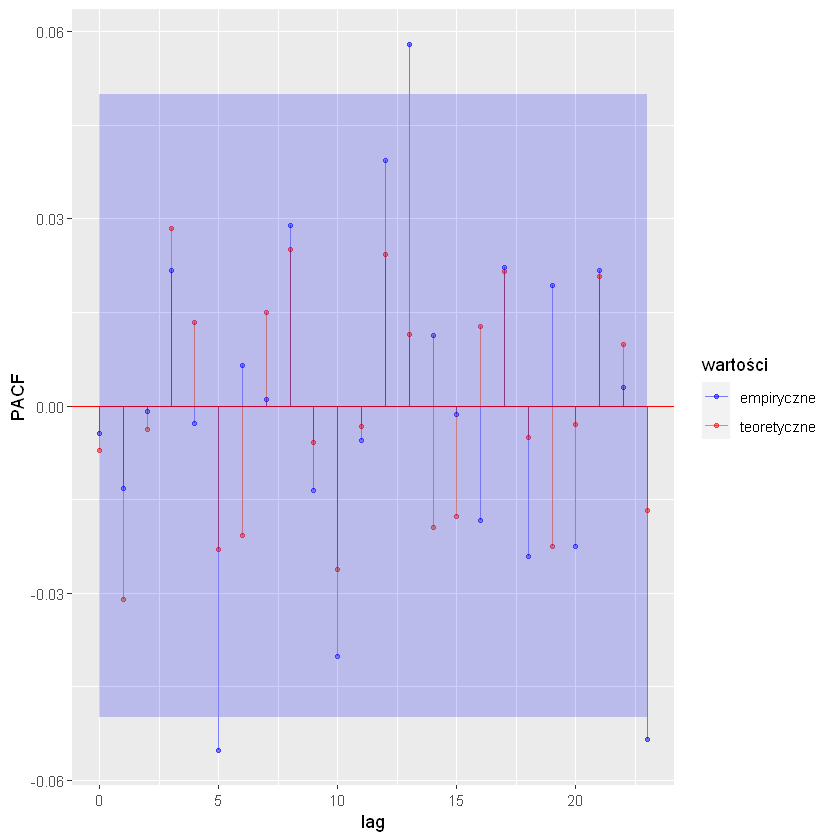

In [85]:
p <- 2
q <- 2
model <- arima(data, order=c(p, 0, q))
sigma <- model$sigma2
coeffs <- model$coef

cfs <- round(model$coef, 3)
cfs
sigma
ar <- cfs[1:p]
ma <- cfs[(p+1):(p+q)]

arma_acf <- ARMAacf(ar, ma, lag.max = 24)
arma_pacf <- ARMAacf(ar, ma, lag.max = 24, pacf=TRUE)
l <- 0:24

func <- function(acf, pacf, arma_acf, arma_pacf, lags) {
    l <- 0:(length(acf))
    stem_acf_empirical <- data.frame("lag"=lags, "ACF"=acf, "wartości"="empiryczne")
    colnames(stem_acf_empirical) <- c("lag", "ACF", "wartości")
    #arma_acf <- read.delim("THEORETICAL_ACF.txt", header = FALSE)
    stem_acf_theoretical <- data.frame("lag"=l, "ACF"=arma_acf, "wartości"="teoretyczne")
    colnames(stem_acf_theoretical) <- c("lag", "ACF", "wartości")
    combined_stems1 <- rbind(stem_acf_empirical, stem_acf_theoretical)
    l2 <- 0:(length(pacf)-1)
    stem_pacf_empirical <- data.frame("lag"=lags, "PACF"=pacf, "wartości"="empiryczne")
    colnames(stem_pacf_empirical) <- c("lag", "PACF", "wartości")
    #arma_pacf <- read.delim("THEORETICAL_PACF.txt", header = FALSE)
    stem_pacf_theoretical <- data.frame("lag"=l2, "PACF"=arma_pacf, "wartości"="teoretyczne")
    colnames(stem_pacf_theoretical) <- c("lag", "PACF", "wartości")
    combined_stems2 <- rbind(stem_pacf_empirical, stem_pacf_theoretical)

    m1 <- ggplot(combined_stems1) +
            geom_segment(aes(lag, ACF, xend=lag, yend=ACF-ACF, color=wartości), alpha = 0.5) + 
            geom_point(aes(lag, ACF, color=wartości), size=1, alpha = 0.5) +
            geom_hline(yintercept=0, color="red") +
            geom_rect(mapping=aes(xmin=0, xmax=hmax, ymin=-0.05, ymax=0.05), 
                      fill="blue", alpha=0.005) +
            scale_color_manual(values=c("blue", "red"))

    m2 <- ggplot(combined_stems2) +
            geom_segment(aes(lag, PACF, xend=lag, yend=PACF-PACF, color=wartości), alpha = 0.5) + 
            geom_point(aes(lag, PACF, color=wartości), size=1, alpha = 0.5) +
            geom_hline(yintercept=0, color="red") +
            geom_rect(mapping=aes(xmin=0, xmax=hmax, ymin=-0.05, ymax=0.05), 
                      fill="blue", alpha=0.005) +
            scale_color_manual(values=c("blue", "red"))
    ggsave("1.jpg", m1)
    ggsave("2.jpg", m2)
    m1
    m2
}
func(acf2, pacf2, arma_acf, arma_pacf, lags)

In [86]:
df_residuals <- data.frame(resids=model$residuals, x=seq_along(model$residuals), date = date[1:length(model$residuals)])

Saving 6.67 x 6.67 in image
Don't know how to automatically pick scale for object of type <ts>. Defaulting to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting to continuous.


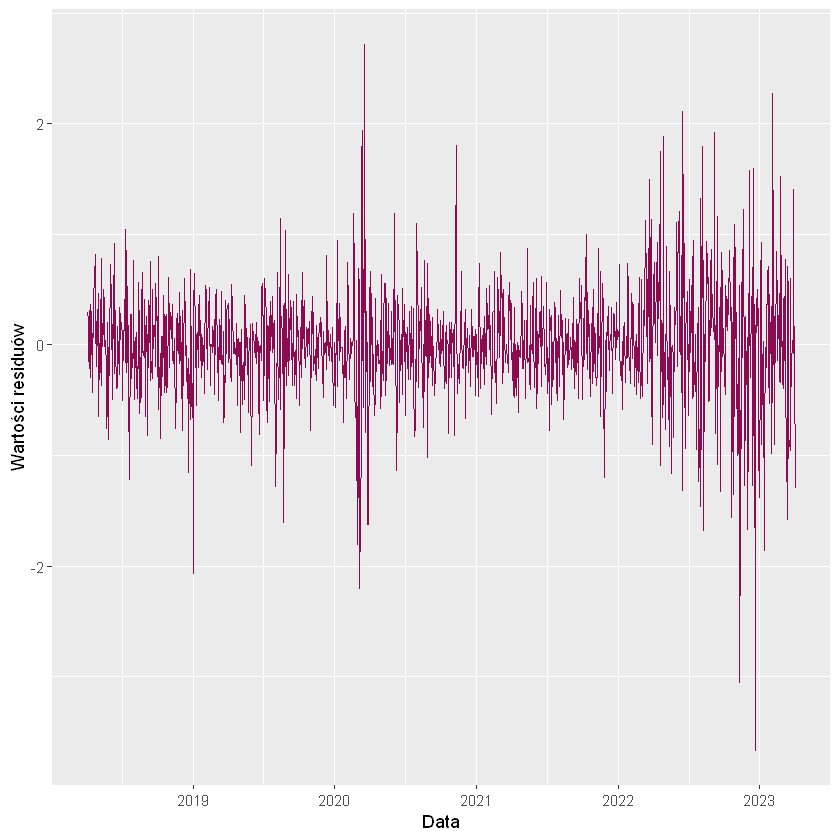

In [87]:
p <- ggplot(df_residuals) + 
  geom_line(aes(x=date, y=resids), color="deeppink4") + 
  labs(x="Data", y="Wartości residuów")
ggsave("res.jpg", p)
p

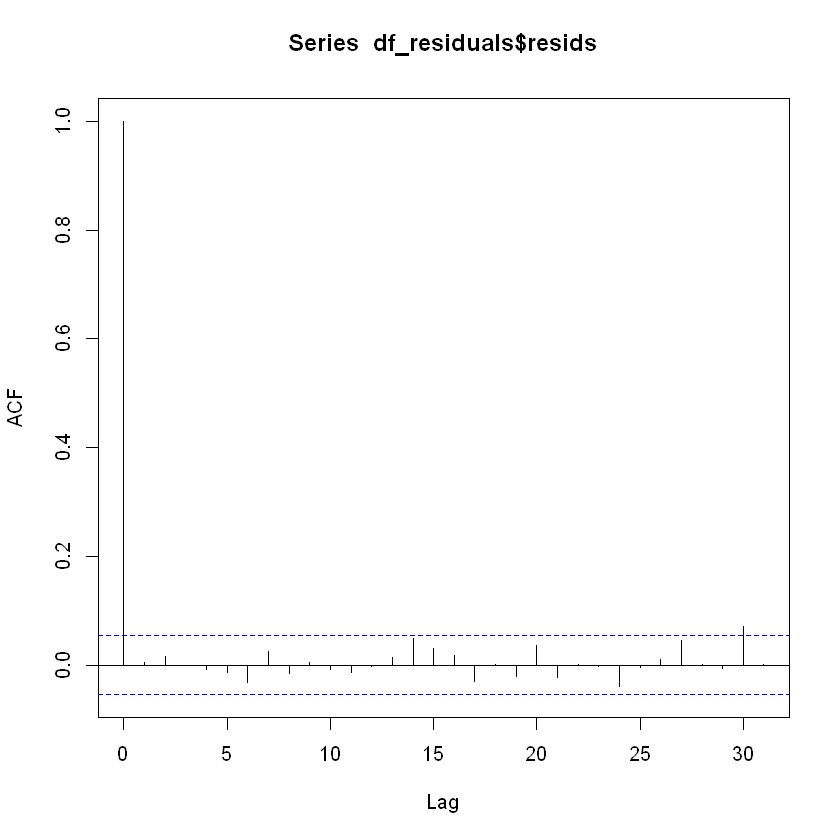

Saving 6.67 x 6.67 in image


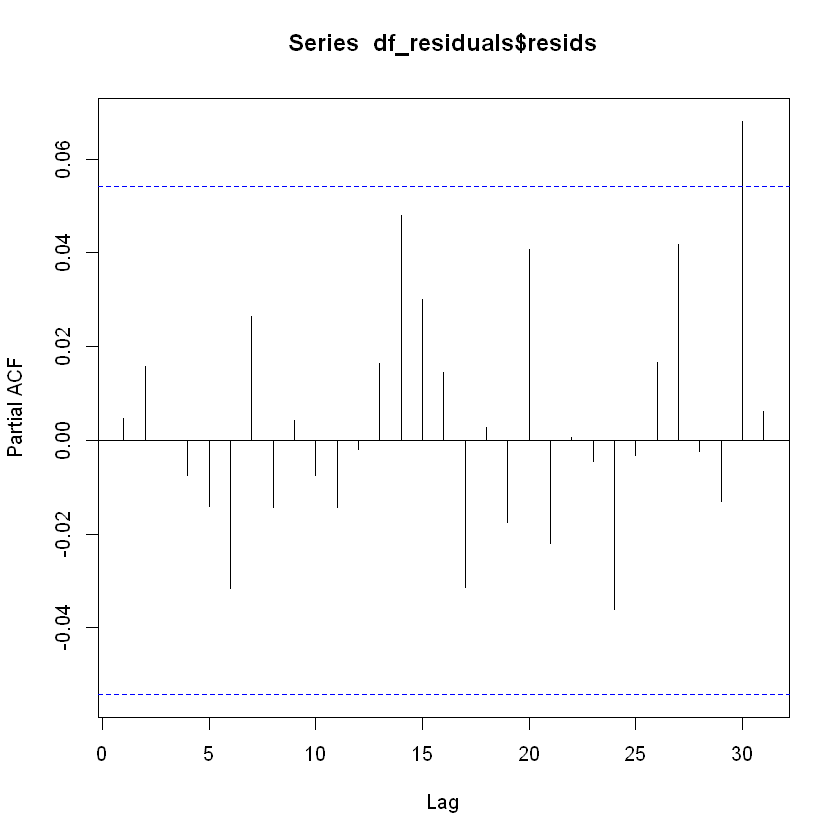

Saving 6.67 x 6.67 in image


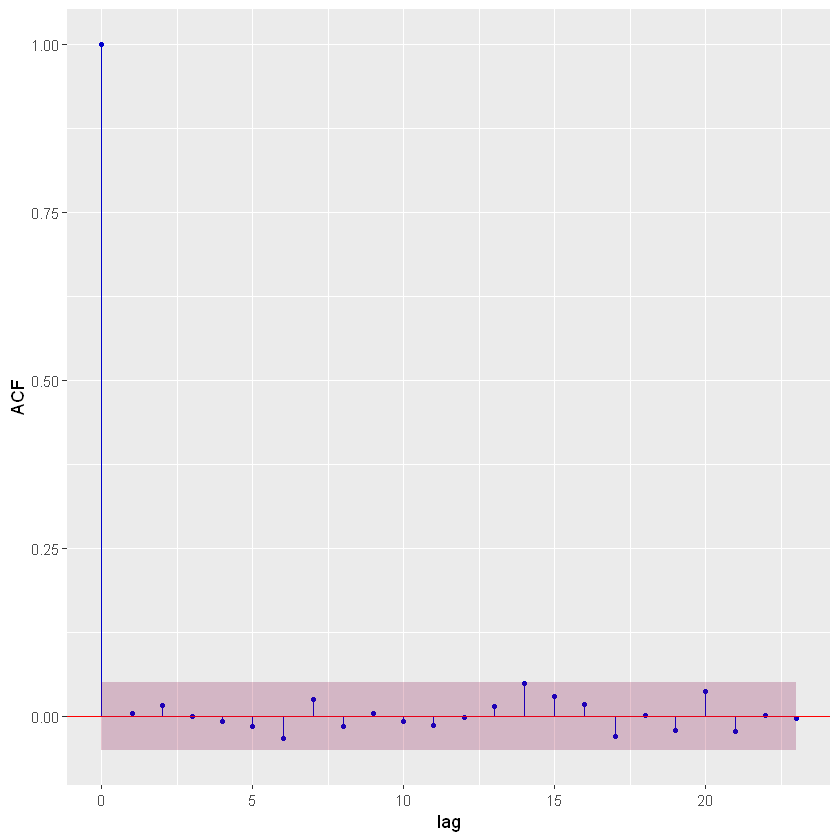

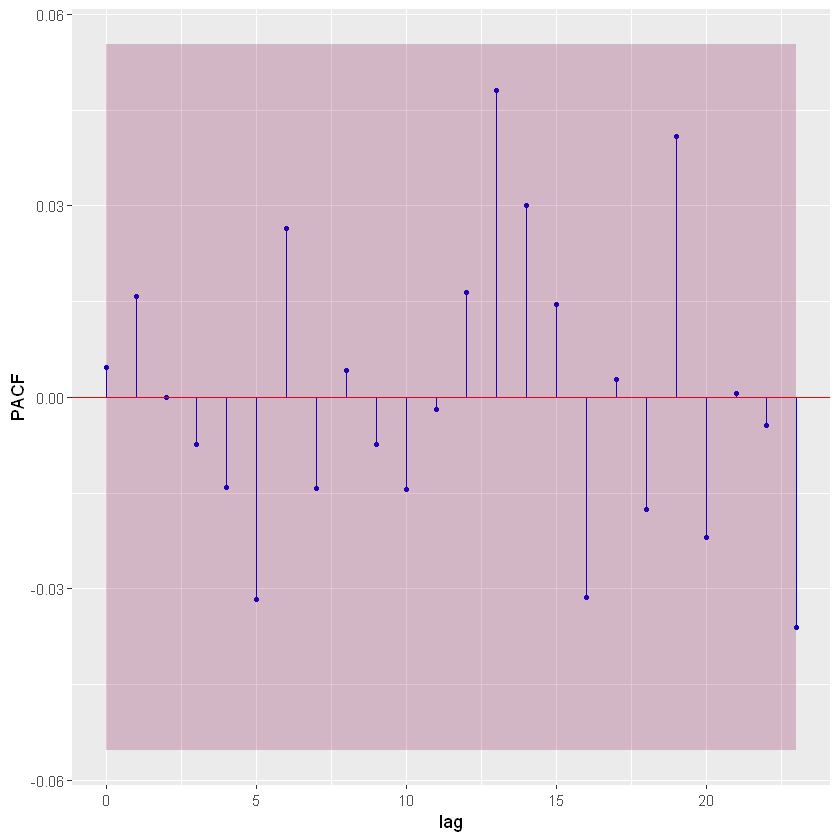

In [88]:
acfr <- acf(df_residuals$resids)$acf[0:hmax+1]
stem1 <- data.frame(lag=lags, ACF=acfr)

pacfr <- pacf(df_residuals$resids)[[1]][0:hmax+1]
stem2 <- data.frame(lag=lags, PACF=pacfr)
colnames(stem2) <- c("lag", "PACF")

draw_acf(stem1, "acf_r.jpg")
draw_pacf(stem2, "pacf_r.jpg")

Saving 6.67 x 6.67 in image
Don't know how to automatically pick scale for object of type <ts>. Defaulting to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting to continuous.


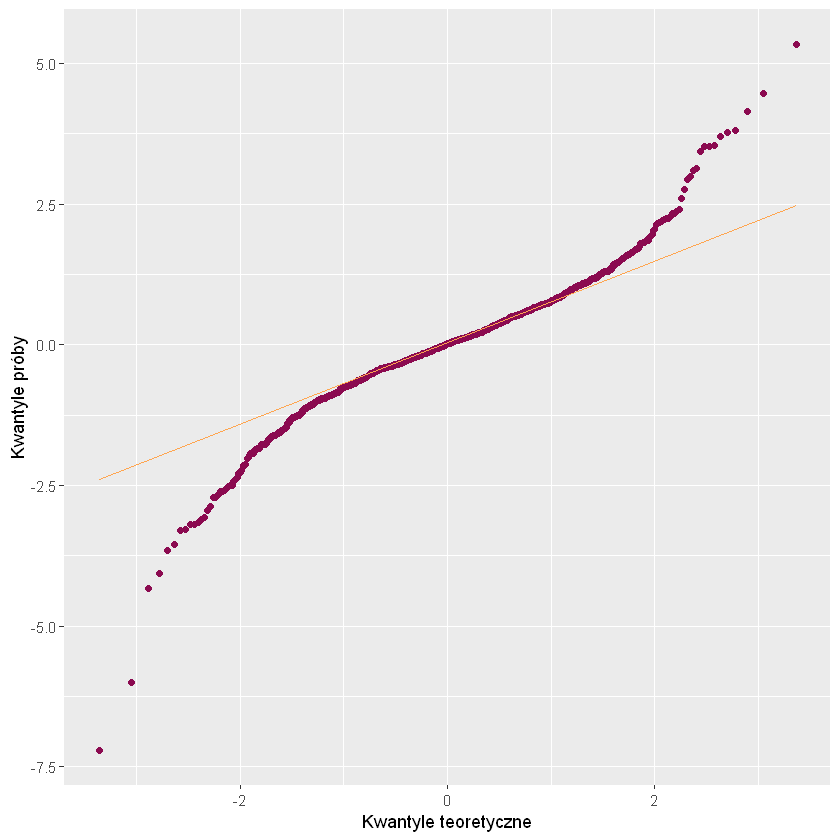

In [89]:
resids <- df_residuals$resids
df_residuals$standarised <- (resids - mean(resids)) / sd(resids)
standarised <- df_residuals$standarised


p <- ggplot(df_residuals, aes(sample=standarised)) +
  stat_qq(color="deeppink4") + 
  stat_qq_line(color="tan1") +
  labs(x="Kwantyle teoretyczne", y="Kwantyle próby")
ggsave("qqplot.jpg", p)
p

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
Don't know how to automatically pick scale for object of type <ts>. Defaulting to continuous.
Saving 6.67 x 6.67 in image
Don't know how to automatically pick scale for object of type <ts>. Defaulting to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting to continuous.


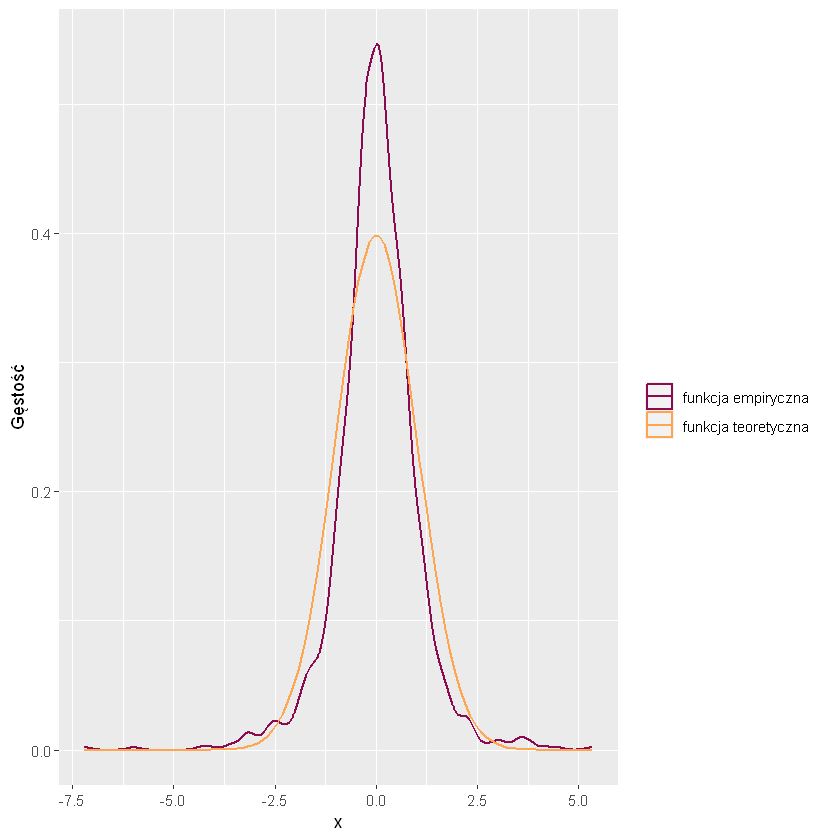

Saving 6.67 x 6.67 in image
Don't know how to automatically pick scale for object of type <ts>. Defaulting to continuous.


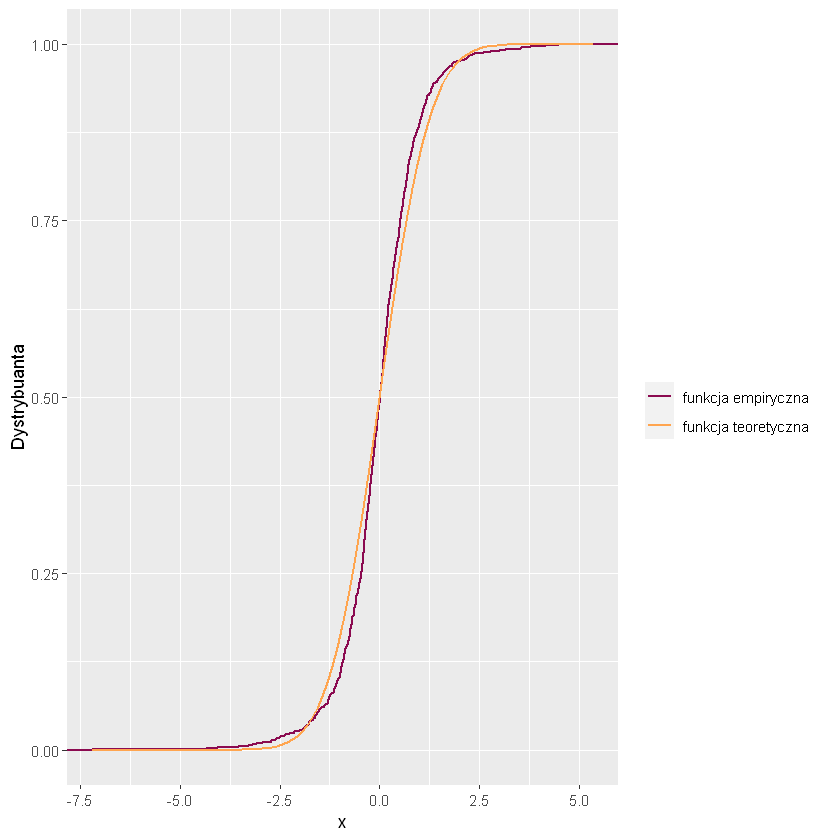

In [90]:
colors <- c("funkcja teoretyczna"="tan1", "funkcja empiryczna"="deeppink4")

p7 <- ggplot(df_residuals, aes(x=standarised)) + 
  geom_density(aes(color="funkcja empiryczna"), 
               size=.82) + 
  geom_function(fun=dnorm, 
                args=list(mean=0, sd=1), 
                aes(color="funkcja teoretyczna"),
                size=.82) + 
  scale_color_manual(values = colors) +
  labs(x="x", y="Gęstość", color="")

p8 <- ggplot(df_residuals, aes(x=standarised)) +
  stat_ecdf(aes(color="funkcja empiryczna"),
            size=.82) + 
  geom_function(fun=pnorm, 
                args=list(mean=0, sd=1),
                aes(color="funkcja teoretyczna"),
                size=0.8) +
  scale_color_manual(values = colors) +
  labs(x="x", y="Dystrybuanta", color="") 

p7
ggsave("gestosc.jpg", p7)
p8
ggsave("dystr.jpg", p8)

In [91]:
arch.test(standarised) ##STAŁA WARIANCJA



	Box-Ljung test

data:  y^2
X-squared = 34.426, df = 2, p-value = 3.345e-08
alternative hypothesis: y is heteroscedastic


jesli pval > 0.05 to proces jest homoskedastyczny, jeśli nie to heteroskedastyczny <br>
homoskedastyczność to znaczy że wszystkie zmienne losowe w szeregu mają tę samą skończoną wariancję <br>
czyli wariancja kijowa

Saving 6.67 x 6.67 in image


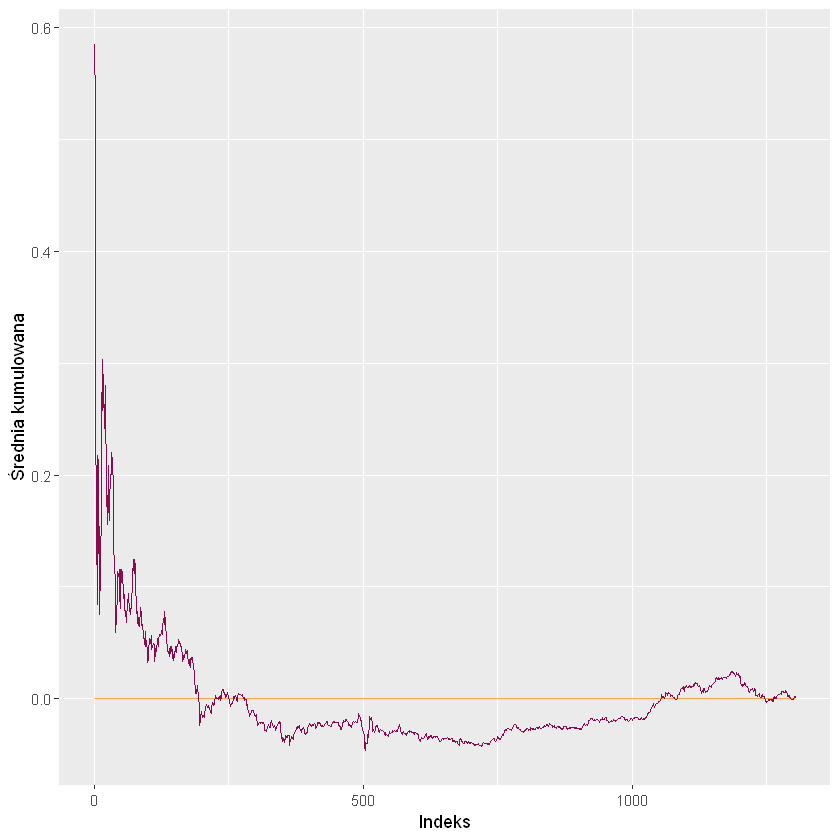

In [92]:
cum_avg <- cumsum(standarised) / seq_along(standarised)

p <- ggplot() + geom_line(aes(c(0,length(standarised)), c(0,0)), color="tan1") +
geom_line(aes(seq_along(standarised), cum_avg), color="deeppink4") +
labs(x = "Indeks", y="Średnia kumulowana")
ggsave("cavg.jpg", p)
p

In [94]:
M <- 1000
p<-2
q<-2

pacf_arma <- replicate(M, runif(25))
dim(pacf_arma) <- c(M, 25)

for (k in 1:M) {
    X <- arima.sim(model=list(order = c(p,0,q), ar=ar, ma=ma), n=1000, sd=sqrt(sigma))
    PACF_X <- pacf(X, pl=F, lag=25)
    pacf_arma[k, ] <- PACF_X$acf
}

dolne_pacf <- replicate(25,0)
gorne_pacf <- replicate(25,0)
alfa <- 0.05

for (i in 1:25){
    dolne_pacf[i] <- quantile(pacf_arma[, i], alfa/2)
    gorne_pacf[i] <- quantile(pacf_arma[, i], 1-alfa/2)
}

df <- data.frame(acf= arma_pacf, dacf=pacf2, lag = 0:23, aa = dolne_pacf[1:length(arma_pacf)], bb=gorne_pacf[1:length(arma_pacf)])

p <- ggplot(df) + #geom_segment(aes(lag, acf, xend=lag, yend=acf-acf), alpha = 0.5) + 
            geom_point(aes(lag, acf), size=1, color="tan1") + geom_point(aes(lag, dacf), size=1) +
            geom_line(aes(lag, aa), color="deeppink4") + geom_line(aes(lag, bb), color="deeppink4") +
            geom_ribbon(aes(x=lag, y=acf, ymin=aa,ymax=bb), fill="deeppink4", alpha=0.1) +labs(x="lag", y="pacf")


Saving 6.67 x 6.67 in image


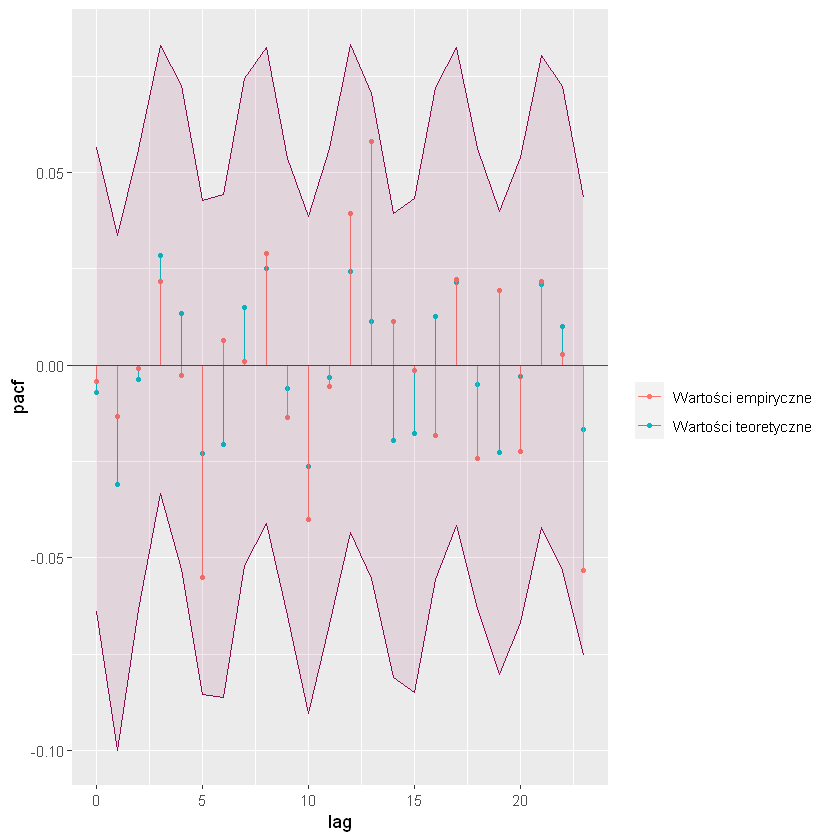

In [95]:
m2 <- ggplot(df) +
            geom_segment(aes(lag, acf, xend=lag, yend=acf-acf, color="Wartości teoretyczne")) + 
            geom_point(aes(lag, acf, color="Wartości teoretyczne"), size=1) +
            geom_segment(aes(lag, dacf, xend=lag, yend=0, color="Wartości empiryczne")) + 
            geom_point(aes(lag, dacf, color="Wartości empiryczne"), size=1) +
            geom_hline(yintercept=0, color="red") +
            geom_ribbon(aes(x=lag, y=acf, ymin=aa,ymax=bb), fill="deeppink4", alpha=0.1) +labs(x="lag", y="pacf")+
            geom_line(aes(x=lag, y=aa), color="deeppink4")+ geom_line(aes(x=lag, y=bb), color="deeppink4") +
            scale_color_discrete(name="")
            #scale_color_manual(values=c("blue", "red"))
ggsave("pacf_ufnosci.jpg", m2)
m2

Saving 6.67 x 6.67 in image


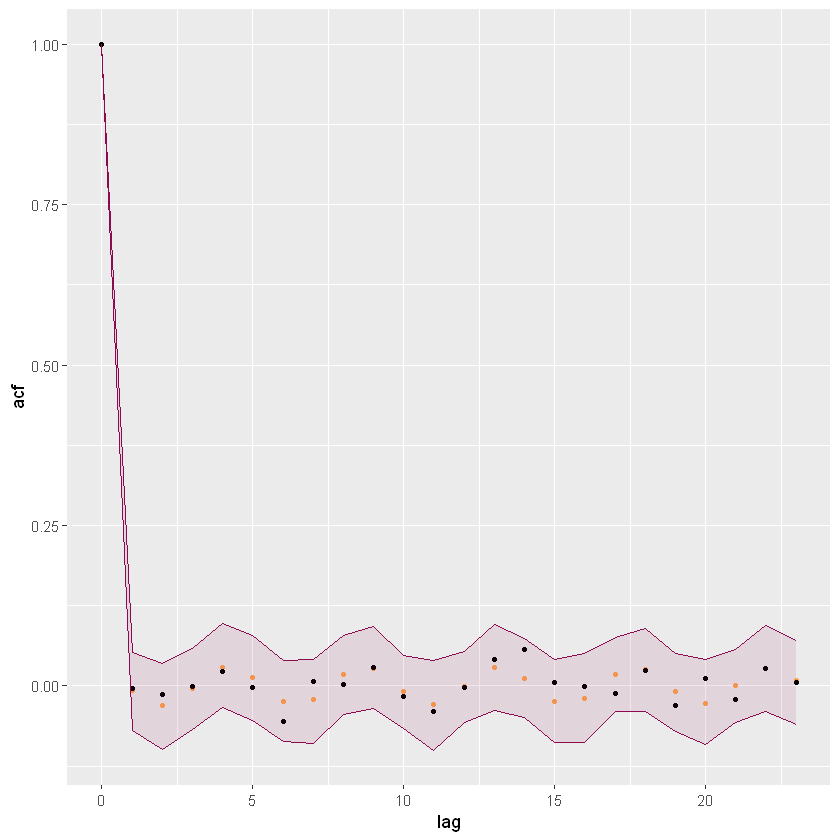

In [97]:
M <- 1000
p<-2
q<-2

pacf_arma <- replicate(M, runif(25))
dim(pacf_arma) <- c(M, 25)

for (k in 1:M) {
    X <- arima.sim(model=list(order = c(p,0,q), ar=ar, ma=ma), n=1000, sd=sqrt(sigma))
    PACF_X <- acf(X, pl=F, lag=24)
    pacf_arma[k, ] <- PACF_X$acf
}

dolne_pacf <- replicate(25,0)
gorne_pacf <- replicate(25,0)
alfa <- 0.05

for (i in 1:25){
    dolne_pacf[i] <- quantile(pacf_arma[, i], alfa/2)
    gorne_pacf[i] <- quantile(pacf_arma[, i], 1-alfa/2)
}

df <- data.frame(acf= arma_acf[1:length(acf2)], dacf=acf2, lag = 0:23, aa = dolne_pacf[1:length(arma_pacf)], bb=gorne_pacf[1:length(arma_pacf)])

p <- ggplot(df) + #geom_segment(aes(lag, acf, xend=lag, yend=acf-acf), alpha = 0.5) + 
            geom_point(aes(lag, acf), size=1, color="tan1") + geom_point(aes(lag, dacf), size=1) +
            geom_line(aes(lag, aa), color="deeppink4") + geom_line(aes(lag, bb), color="deeppink4") +
            geom_ribbon(aes(x=lag, y=acf, ymin=aa,ymax=bb), fill="deeppink4", alpha=0.1) +labs(x="lag", y="acf")
ggsave("acf_ufnosc.jpg", p)
p

---------
# SYMULACJE

In [185]:
p<-2
q<-2
M <- 10

In [186]:
a <- replicate(M, arima.sim(model=list(order = c(p, 0, q), ar=ar, ma=ma), n=365, sd=sqrt(sigma)) )

In [187]:
length(a[1,])

[1] 10

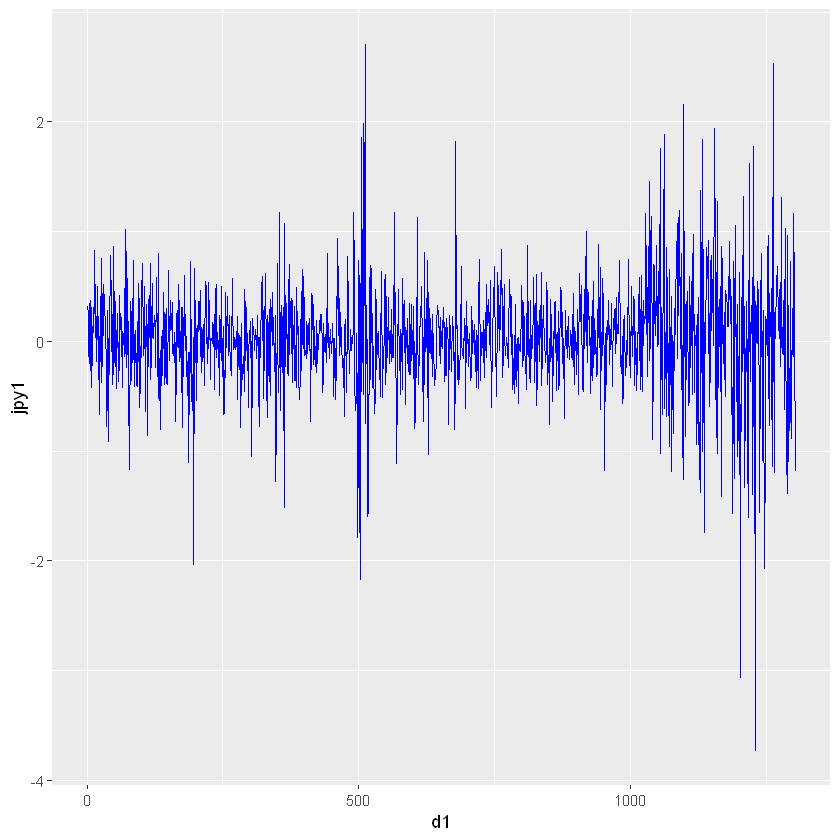

In [188]:
d1 <-1:length(jpy1)
d <- (length(jpy1)+1):(length(jpy1)+365)
ggplot() + geom_line(aes(d1, jpy1), color="blue")

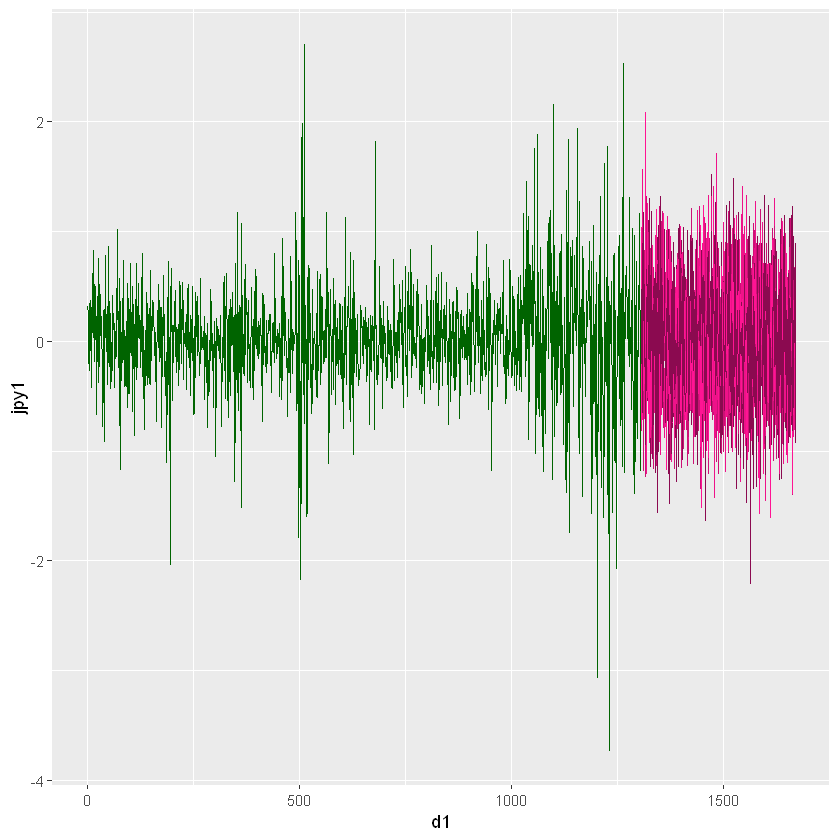

In [184]:
P <- ggplot() + geom_line(aes(d1, jpy1), color="darkgreen") + geom_line(aes(d, a[,1]), color="deeppink4")+ geom_line(aes(d, a[,2]), color="deeppink3") + 
geom_line(aes(d, a[,3]), color="deeppink2") + geom_line(aes(d, a[,4]), color="deeppink4")+ geom_line(aes(d, a[,5]), color="deeppink3") + 
geom_line(aes(d, a[,6]), color="deeppink2") + geom_line(aes(d, a[,7]), color="deeppink1")+ geom_line(aes(d, a[,8]), color="deeppink4") #+ 
#geom_line(aes(d, a[,9]), color="deeppink2") + geom_line(aes(d, a[,10]), color="deeppink4")

P

In [180]:
b <- replicate(1000, arima.sim(model=list(order = c(p, 0, q), ar=ar, ma=ma), n=365, sd=sqrt(sigma)) )


In [181]:
length(b[365,])

[1] 1000

In [182]:
val_365 <- b[365,]

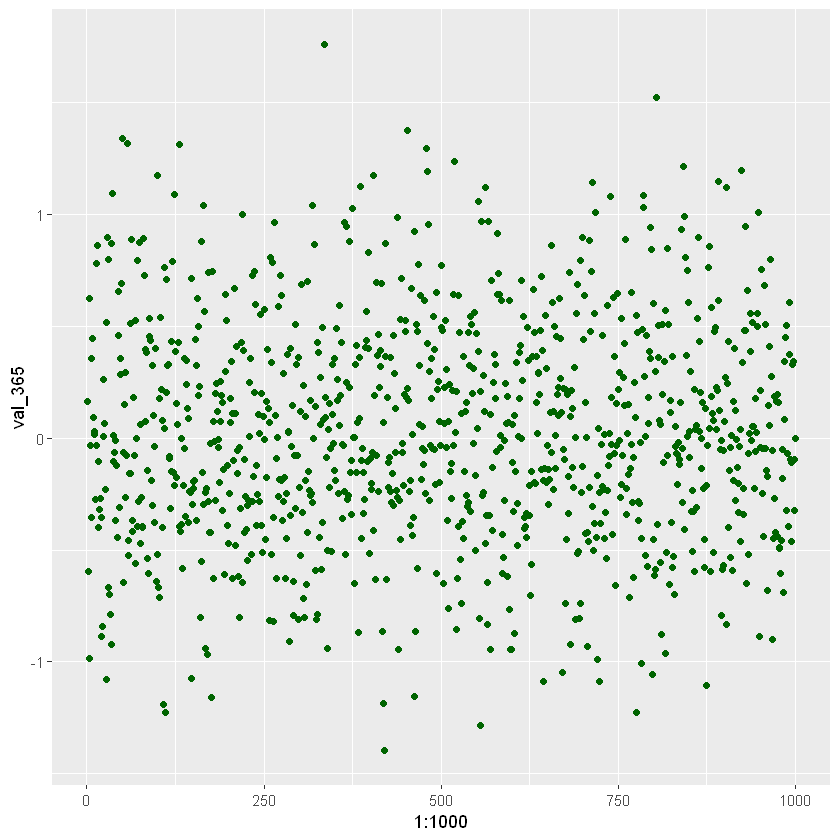

In [192]:
ggplot() + geom_point(aes(1:1000, val_365), color="darkgreen")

In [194]:
quantile(vals_365, 0.99)
quantile(vals_365, 0.95)


99% 
0.5459133

95% 
0.5020457

In [195]:
quantile(vals_365, 0.01)
quantile(vals_365, 0.05)


1% 
-1.332697

5% 
-1.079129

zgubiłam się czy analizujemy straty czy zyski